In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]
from scubas.datasets import PROFILES
from scubas.models import OceanModel
from scubas.plotlib import plot_transfer_function, potential_along_section, cable_potential, update_rc_params
from scubas.cables import TransmissionLine, Cable
from scubas.conductivity import ConductivityProfile as CP

import pandas as pd
import datetime as dt
import bezpy
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/shibaji/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


2023-10-25 16:48:21.392 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Deep Ocean E- and B-Fields


{'figure': <Figure size 540x450 with 2 Axes>,
 'axes': <matplotlib.axes._subplots.AxesSubplot at 0x7f7e662b6fd0>}

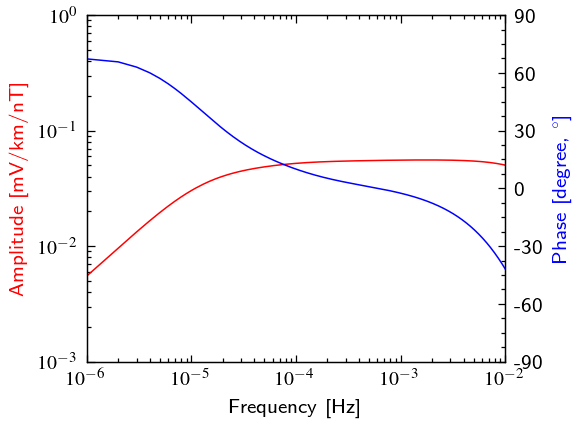

In [2]:
site = PROFILES.DO_3
om = OceanModel(site)
tf = om.get_TFs()
plot_transfer_function(tf)

2023-10-25 16:48:24.792 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:24.793 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:24.798 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:24.798 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:24.799 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:24.799 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:24.799 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:24.800 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:24.800 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:24.801 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections

Text(0.05, 0.85, '$L_{cs}$=600km')

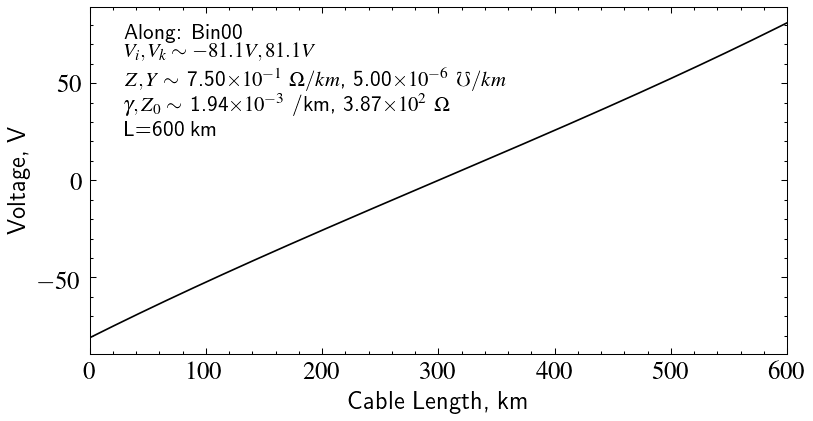

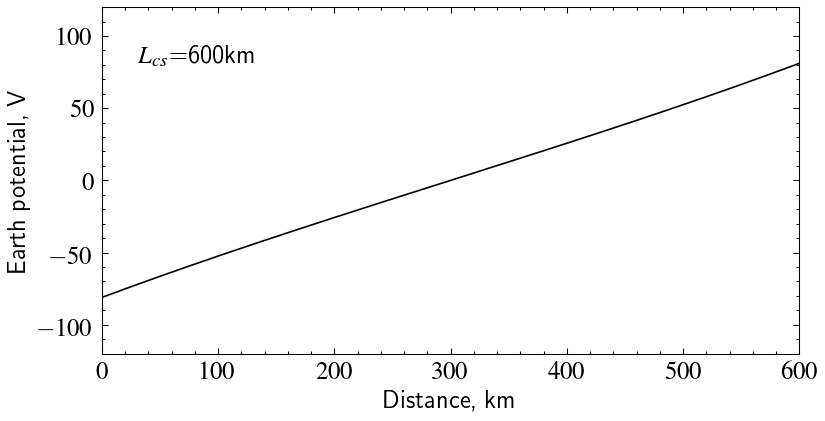

In [3]:
e_CS, e_DO = pd.DataFrame(), pd.DataFrame()
e_CS["X"], e_CS["dTime"] = [300], [0]
e_DO["X"], e_DO["dTime"] = [100], [0]
length=600
tl = TransmissionLine(
    sec_id="CS",
    directed_length=dict(
        length_north=length,
    ),
    elec_params=dict(
        site=PROFILES.CS,
        width=1.0,
        flim=[1e-6, 1e0],
    ),
    active_termination=dict(
        right=None,
        left=None,
    ),
)
tl.compute_eqv_pi_circuit(e_CS, ["X"])
cable = Cable([tl], ["X"])
V, x = tl._pot_alongCS_()
potential_along_section(V, x, 0, tl.end_pot.Vi, tl.end_pot.Vk, tl.Z, tl.Y, tl.gma, tl.Z0)
Vc, Lc = cable._pot_along_cable_(0)
tag = cable_potential(Vc, Lc, ylim=[-120, 120])
tag["axes"].text(0.05, 0.85, r"$L_{cs}$=%dkm"%length, ha="left", va="center", transform=tag["axes"].transAxes)

2023-10-25 16:48:25.950 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:25.950 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:25.951 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:25.951 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width SO: 1.0
2023-10-25 16:48:25.952 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:25.952 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:25.953 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:25.957 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:25.959 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:25.960 | INFO  

{'figure': <Figure size 900x450 with 1 Axes>,
 'axes': <matplotlib.axes._subplots.AxesSubplot at 0x7f7ec4adf510>}

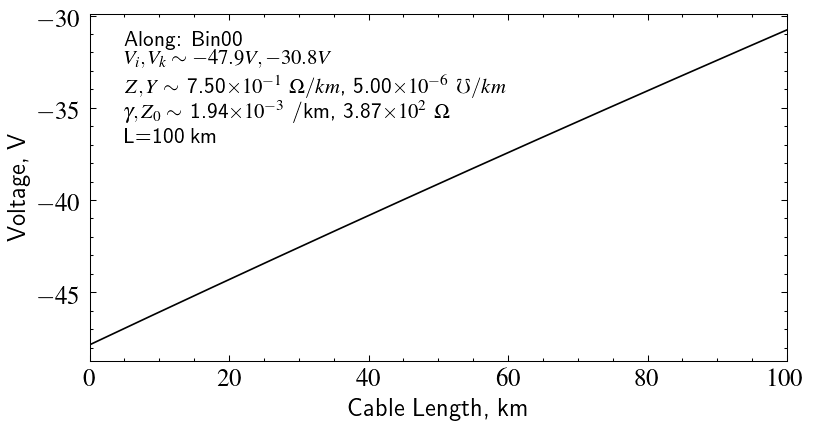

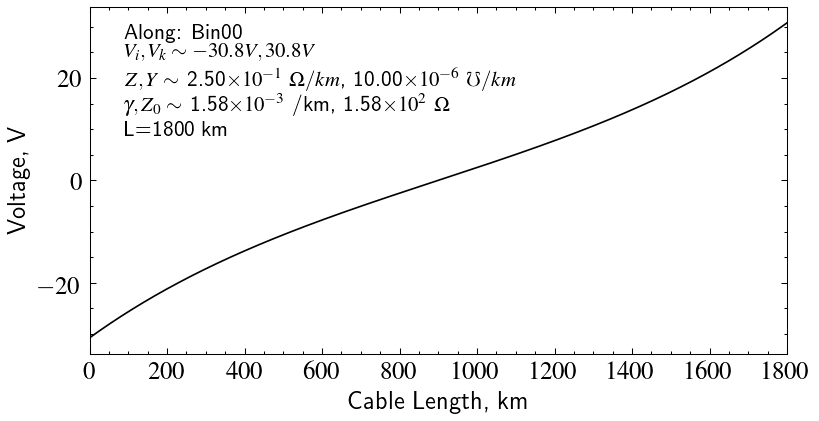

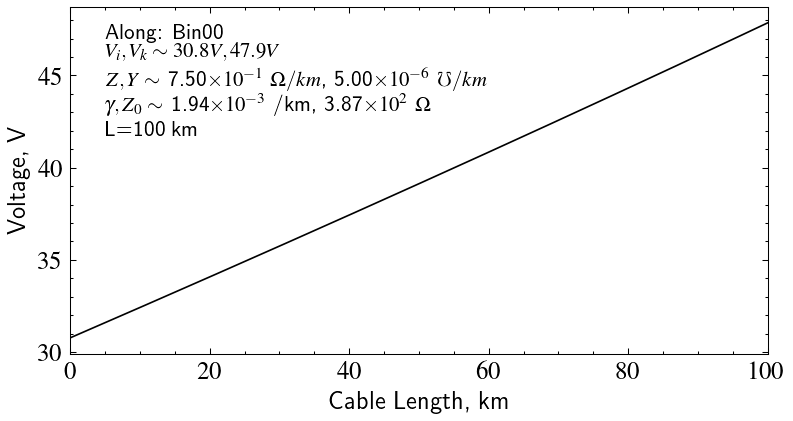

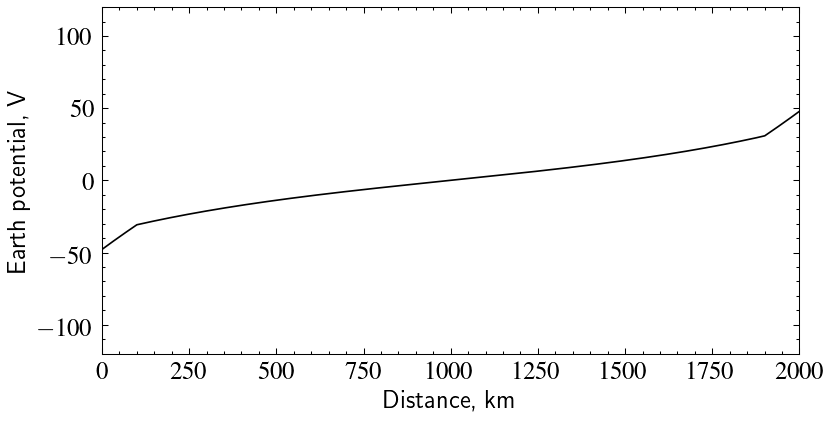

In [4]:
# Compute for shallow ocean
tlines = []
tlines.append(
    TransmissionLine(
        sec_id="CS1",
        directed_length=dict(
            length_north=100,
        ),
        elec_params=dict(
            site=PROFILES.CS,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=PROFILES.LD,
        ),
    )
)
tlines.append(
    TransmissionLine(
        sec_id="SO",
        directed_length=dict(
            length_north=1800,
        ),
        elec_params=dict(
            site=PROFILES.SO,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    )
)
tlines.append(
    TransmissionLine(
        sec_id="CS2",
        directed_length=dict(
            length_north=100,
        ),
        elec_params=dict(
            site=PROFILES.CS,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=PROFILES.LD,
            left=None,
        ),
    )
)
tlines[0].compute_eqv_pi_circuit(e_CS, ["X"])
tlines[1].compute_eqv_pi_circuit(e_DO, ["X"])
tlines[2].compute_eqv_pi_circuit(e_CS, ["X"])

cable = Cable(tlines, ["X"])
for tl in tlines:
    V, x = tl._pot_alongCS_()
    potential_along_section(V, x, 0, tl.end_pot.Vi, tl.end_pot.Vk, tl.Z, tl.Y, tl.gma, tl.Z0)
    
Vc, Lc = cable._pot_along_cable_(0)
cable_potential(Vc, Lc, ylim=[-120, 120])

2023-10-25 16:48:26.814 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:26.815 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:26.815 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:26.816 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:26.816 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:26.817 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:26.818 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:26.822 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:26.824 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:26.824 | INFO  

{'figure': <Figure size 900x450 with 1 Axes>,
 'axes': <matplotlib.axes._subplots.AxesSubplot at 0x7f7e6390d2d0>}

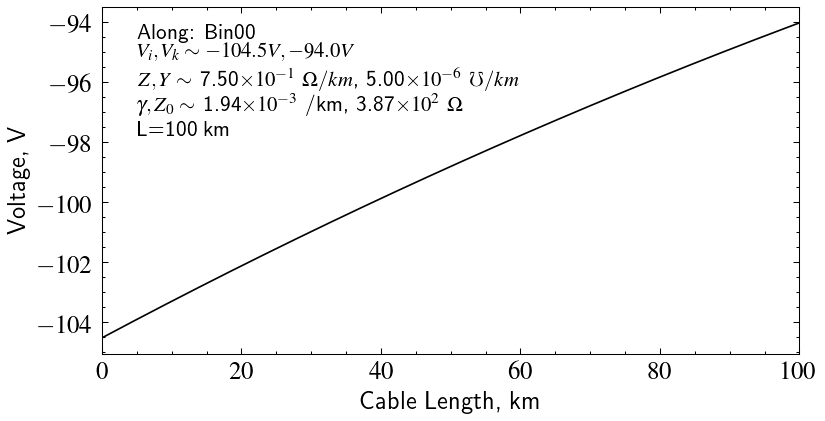

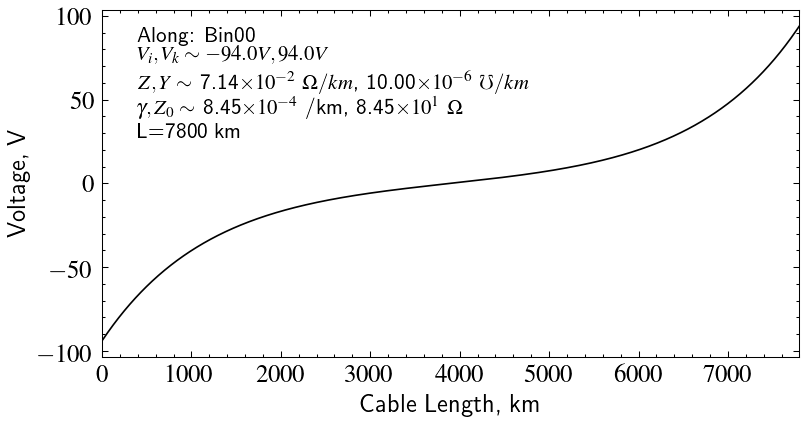

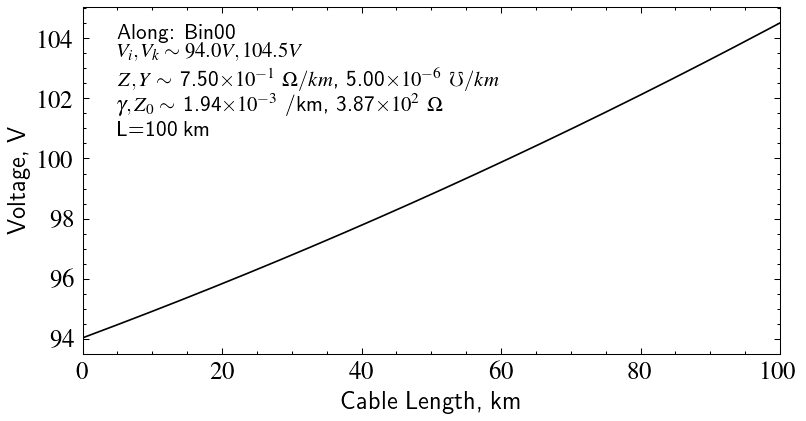

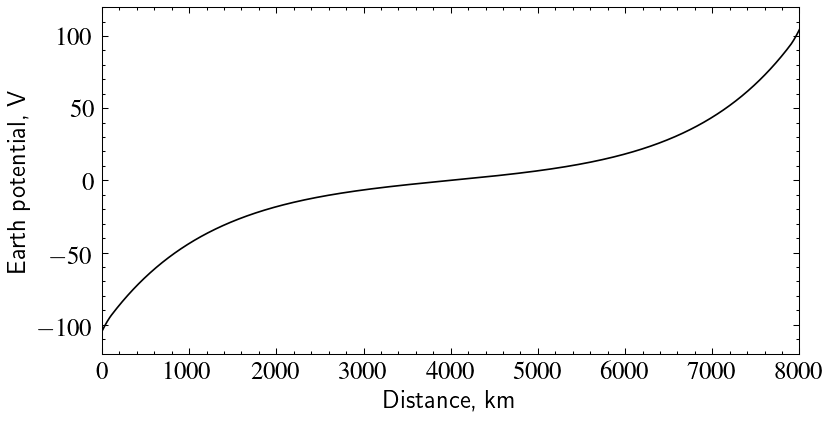

In [5]:
# Compute for deep ocean
tlines = []
tlines.append(
    TransmissionLine(
        sec_id="CS1",
        directed_length=dict(
            length_north=100,
        ),
        elec_params=dict(
            site=PROFILES.CS,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=PROFILES.LD,
        ),
    )
)
tlines.append(
    TransmissionLine(
        sec_id="DO",
        directed_length=dict(
            length_north=7800,
        ),
        elec_params=dict(
            site=PROFILES.DO,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    )
)
tlines.append(
    TransmissionLine(
        sec_id="CS2",
        directed_length=dict(
            length_north=100,
        ),
        elec_params=dict(
            site=PROFILES.CS,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=PROFILES.LD,
            left=None,
        ),
    )
)
tlines[0].compute_eqv_pi_circuit(e_CS, ["X"])
tlines[1].compute_eqv_pi_circuit(e_DO, ["X"])
tlines[2].compute_eqv_pi_circuit(e_CS, ["X"])

cable = Cable(tlines, ["X"])
for tl in tlines:
    V, x = tl._pot_alongCS_()
    potential_along_section(V, x, 0, tl.end_pot.Vi, tl.end_pot.Vk, tl.Z, tl.Y, tl.gma, tl.Z0)
    
Vc, Lc = cable._pot_along_cable_(0)
cable_potential(Vc, Lc, ylim=[-120, 120])

2023-10-25 16:48:27.769 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:27.770 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:27.770 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:27.771 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:27.773 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:27.773 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:27.774 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:27.774 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:27.774 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:27.775 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solvi

2023-10-25 16:48:27.892 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:27.892 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:27.892 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:27.893 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:27.893 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:27.894 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:27.894 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:27.895 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:27.895 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -102.25 102.25
2023-10-25 16:48:27.904 | INFO     | scubas.cables

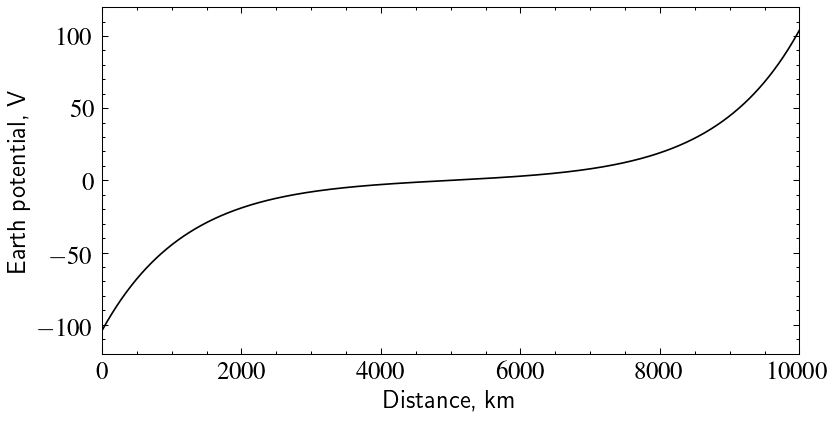

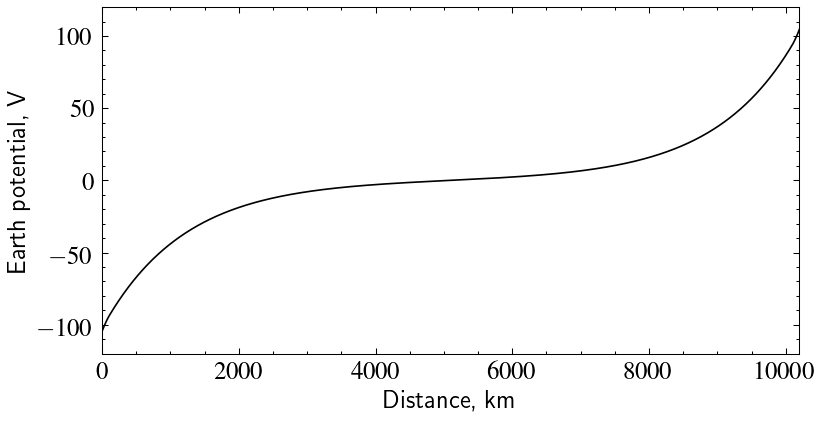

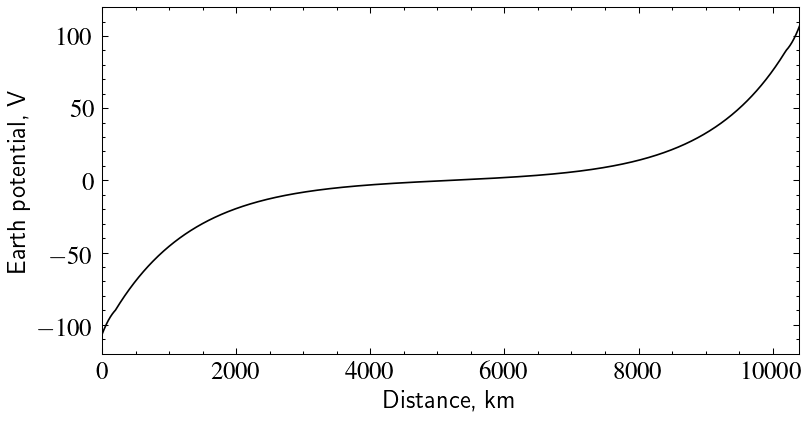

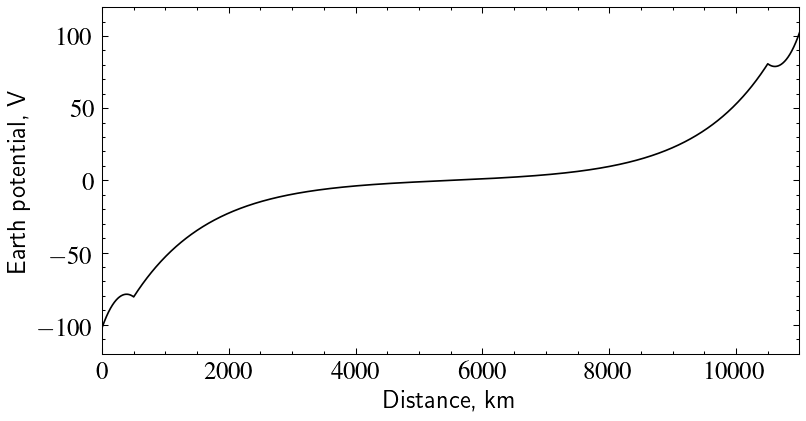

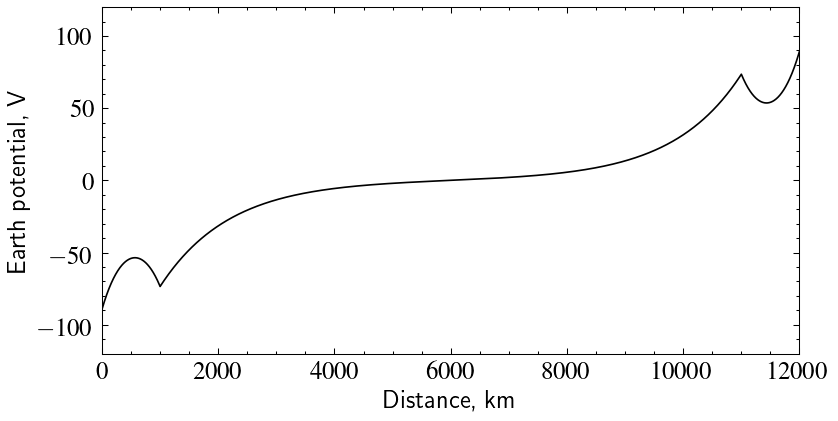

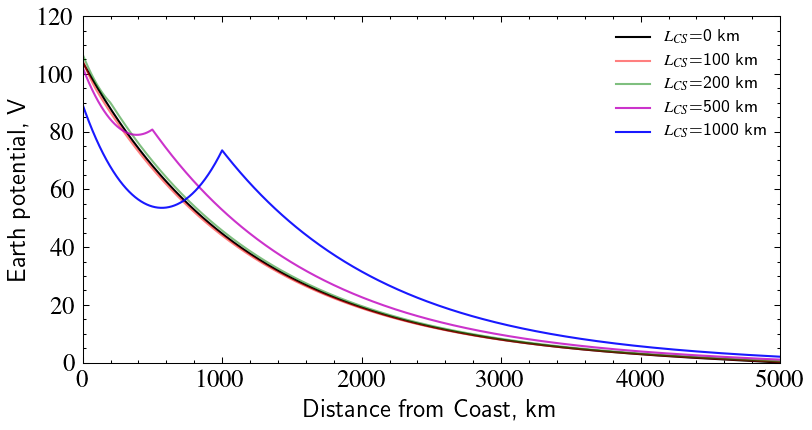

In [6]:
# Compute for deep ocean
lengths = [0, 100, 200, 500, 1000]
cable_lists = []
for i, l in enumerate(lengths):
    tlines = []
    if i > 0:
        tlines.append(
            TransmissionLine(
                sec_id="CS1",
                directed_length=dict(
                    length_north=l,
                ),
                elec_params=dict(
                    site=PROFILES.CS,
                    width=1.0,
                    flim=[1e-6, 1e0],
                ),
                active_termination=dict(
                    right=None,
                    left=PROFILES.LD,
                ),
            )
        )
        tlines.append(
            TransmissionLine(
                sec_id="DO",
                directed_length=dict(
                    length_north=10000,
                ),
                elec_params=dict(
                    site=PROFILES.DO,
                    width=1.0,
                    flim=[1e-6, 1e0],
                ),
                active_termination=dict(
                    right=None,
                    left=None,
                ),
            )
        )
        tlines.append(
            TransmissionLine(
                sec_id="CS2",
                directed_length=dict(
                    length_north=l,
                ),
                elec_params=dict(
                    site=PROFILES.CS,
                    width=1.0,
                    flim=[1e-6, 1e0],
                ),
                active_termination=dict(
                    right=PROFILES.LD,
                    left=None,
                ),
            )
        )
        tlines[0].compute_eqv_pi_circuit(e_CS, ["X"])
        tlines[1].compute_eqv_pi_circuit(e_DO, ["X"])
        tlines[2].compute_eqv_pi_circuit(e_CS, ["X"])
    else:
        tlines.append(
            TransmissionLine(
                sec_id="DO",
                directed_length=dict(
                    length_north=10000,
                ),
                elec_params=dict(
                    site=PROFILES.DO,
                    width=1.0,
                    flim=[1e-6, 1e0],
                ),
                active_termination=dict(
                    right=PROFILES.LD,
                    left=PROFILES.LD,
                ),
            )
        )
        tlines[0].compute_eqv_pi_circuit(e_DO, ["X"])
    
    cable = Cable(tlines, ["X"])
    Vc, Lc = cable._pot_along_cable_(0)
    cable_potential(Vc, Lc, ylim=[-120, 120])
    cable_lists.append(cable)
update_rc_params(
        {"xtick.labelsize": 12, "ytick.labelsize": 12, "font.size": 12}, True
)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
fig, ax = plt.subplots(
    nrows=1, ncols=1, dpi=150, figsize=(6, 3), sharex="all", sharey="all"
)
ax.set_ylabel("Earth potential, V")
ax.set_xlabel("Distance from Coast, km")
alpha=[1, 0.5, 0.5, 0.8, 0.9]
color=["k", "r", "g", "m", "b"]
for i, cx in enumerate(cable_lists):
    Vc, Lc = cx._pot_along_cable_(0)
    x = np.array(Lc)
    ax.plot(
        x[-1]-x, Vc,
        #c=list(dict(mcolors.TABLEAU_COLORS).keys())[i], 
        c=color[i],
        lw=1, 
        ls="-", label=r"$L_{CS}$=%d km"%lengths[i], alpha=alpha[i]
    )
ax.set_xlim(0, 5000)
ax.set_ylim(0, 120)
ax.legend(loc=1, prop={"size": 8})

In [7]:
lengths = np.arange(1e-3, 5000, 100)
Uc, Ue = [], []
cable_lists = []
for i, l in enumerate(lengths):
    tlines = []
    tlines.append(
        TransmissionLine(
            sec_id="CS1",
            directed_length=dict(
                length_north=l,
            ),
            elec_params=dict(
                site=PROFILES.CS,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=None,
                left=PROFILES.LD,
            ),
        )
    )
    tlines.append(
        TransmissionLine(
            sec_id="DO",
            directed_length=dict(
                length_north=10000,
            ),
            elec_params=dict(
                site=PROFILES.DO,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=None,
                left=None,
            ),
        )
    )
    tlines.append(
        TransmissionLine(
            sec_id="CS2",
            directed_length=dict(
                length_north=l,
            ),
            elec_params=dict(
                site=PROFILES.CS,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=PROFILES.LD,
                left=None,
            ),
        )
    )
    tlines[0].compute_eqv_pi_circuit(e_CS, ["X"])
    tlines[1].compute_eqv_pi_circuit(e_DO, ["X"])
    tlines[2].compute_eqv_pi_circuit(e_CS, ["X"])
#     else:
#         tlines.append(
#             TransmissionLine(
#                 sec_id="DO",
#                 directed_length=dict(
#                     length_north=10000,
#                 ),
#                 elec_params=dict(
#                     site=PROFILES.DO,
#                     width=1.0,
#                     flim=[1e-6, 1e0],
#                 ),
#                 active_termination=dict(
#                     right=PROFILES.LD,
#                     left=PROFILES.LD,
#                 ),
#             )
#         )
#         tlines[0].compute_eqv_pi_circuit(e_DO, ["X"])
    
    cable = Cable(tlines, ["X"])
    Vc, Lc = cable._pot_along_cable_(0)
    Uc.append(Vc[-1])
    #if i > 0:
    V, x = tlines[1]._pot_alongCS_()
#     else:
#         V, x = tlines[0]._pot_alongCS_()
    #if i==0:
    Ue.append(V[-1])


2023-10-25 16:48:29.107 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.107 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.108 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.108 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:29.109 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.109 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.110 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.114 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.116 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:29.117 | INFO  

2023-10-25 16:48:29.189 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.190 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:29.190 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.191 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.191 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.196 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.199 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:29.200 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:29.200 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:29.200 | INFO     | scubas.cables:run_nod

2023-10-25 16:48:29.260 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.261 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.261 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.265 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.267 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:29.268 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:29.268 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:29.268 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:29.269 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:29.269 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:29.269 |

2023-10-25 16:48:29.328 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.332 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:29.334 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:29.335 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:29.335 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:29.335 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:29.336 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:29.336 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:29.336 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:29.337 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:29.337 | I

2023-10-25 16:48:29.401 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:29.401 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:29.402 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:29.402 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:29.403 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:29.403 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:29.403 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:29.404 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:29.404 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:29.404 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:29.405 | INFO     | 

2023-10-25 16:48:29.469 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:29.470 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:29.470 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:29.470 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:29.471 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:29.471 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:29.471 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:29.472 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:29.472 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:29.472 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 

2023-10-25 16:48:29.537 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:29.538 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:29.538 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:29.539 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:29.539 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:29.539 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:29.540 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:29.540 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:29.540 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:29.541 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the e

2023-10-25 16:48:29.606 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:29.606 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:29.606 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:29.607 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:29.608 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:29.608 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:29.608 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:29.609 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -79.02 79.02
2023-10-25 16:48:29.615 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.616 | INFO 

2023-10-25 16:48:29.687 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:29.688 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(4, 1), Sh(Y):(4, 4)
2023-10-25 16:48:29.688 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:29.688 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:29.689 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:29.689 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -78.34 78.34
2023-10-25 16:48:29.699 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.699 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.700 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.701 | INFO     | s

2023-10-25 16:48:29.771 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(4, 1)
2023-10-25 16:48:29.771 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:29.772 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:29.772 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.95 77.95
2023-10-25 16:48:29.781 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.782 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.783 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.784 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.784 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.785 | INFO     | scu

2023-10-25 16:48:29.855 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:29.855 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.74 77.74
2023-10-25 16:48:29.864 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.865 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.866 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.866 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.867 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.867 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.868 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.868 | IN

2023-10-25 16:48:29.947 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.948 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.948 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.949 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:29.950 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.950 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:29.950 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.951 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:29.951 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:29.951 | INFO     | scubas.c

2023-10-25 16:48:30.031 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:30.032 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:30.032 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.033 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.033 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.033 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:30.034 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.034 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.035 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.040 | INFO 

2023-10-25 16:48:30.115 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.115 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.116 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.116 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:30.116 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.117 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.117 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.122 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.125 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.126 | INFO  

2023-10-25 16:48:30.199 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.199 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:30.199 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.200 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.200 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.206 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.208 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.209 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:30.209 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:30.210 | INFO     | scubas.cables:run_nod

2023-10-25 16:48:30.282 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.283 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.283 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.288 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.291 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.292 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:30.292 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:30.292 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:30.293 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:30.293 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:30.294 |

2023-10-25 16:48:30.366 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.371 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS2: 1.0
2023-10-25 16:48:30.374 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.374 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:30.374 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:30.375 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:30.375 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:30.376 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:30.376 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:30.377 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:30.377 | I

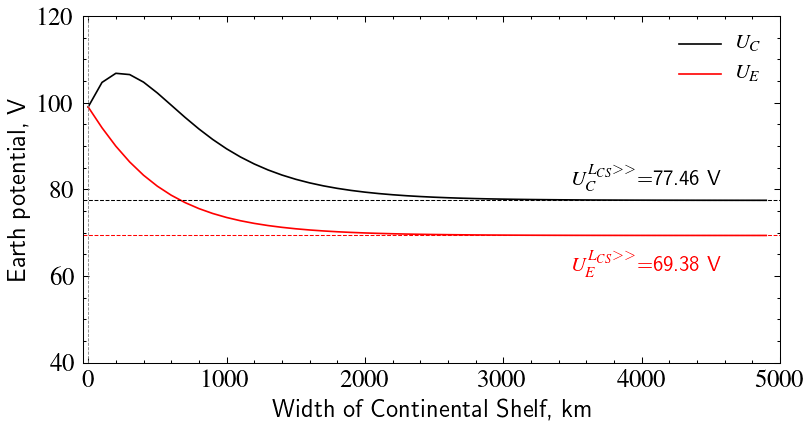

In [8]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, dpi=150, figsize=(6, 3), sharex="all", sharey="all"
)
ax.set_ylabel("Earth potential, V")
ax.set_xlabel("Width of Continental Shelf, km")
ax.plot(
    lengths[:],
    Uc[:],
    "k",
    ls="-",
    lw=0.8,
    label=r"$U_C$"
)
ax.plot(
    lengths[:],
    Ue[:],
    "r",
    ls="-",
    lw=0.8,
    label=r"$U_E$"
)
ax.axhline(77.46, color="k", ls="--", lw=0.5)
ax.axhline(69.38, color="r", ls="--", lw=0.5)
ax.text(3500, 85, r"$U_C^{L_{CS}>>}$=77.46 V", ha="left", va="top", fontdict={"color": "k", "size":10})
ax.text(3500, 65, r"$U_E^{L_{CS}>>}$=69.38 V", ha="left", va="top", fontdict={"color": "r", "size":10})
ax.set_xlim(-40, 5000)
ax.axvline(0, ls="--", lw=0.4, color="gray")
ax.set_ylim(40, 120)
ax.legend(loc=1, prop={"size": 10})

In [9]:
lengths = np.arange(1e-3, 5000, 20)
Uc, Ue = [], []
cable_lists = []
for i, l in enumerate(lengths):
    tlines = []
    tlines.append(
        TransmissionLine(
            sec_id="CS1",
            directed_length=dict(
                length_north=l,
            ),
            elec_params=dict(
                site=PROFILES.CS,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=PROFILES.LD,
                left=PROFILES.LD,
            ),
        )
    )
    tlines[0].compute_eqv_pi_circuit(e_CS, ["X"])
    
    cable = Cable(tlines, ["X"])
    Vc, Lc = cable._pot_along_cable_(0)
    Uc.append(Vc[-1])
    #if i > 0:
    V, x = tlines[0]._pot_alongCS_()
#     else:
#         V, x = tlines[0]._pot_alongCS_()
    #if i==0:
    Ue.append(V[-1])

2023-10-25 16:48:30.743 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.744 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.744 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.745 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.749 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.749 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:30.750 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:30.750 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:30.751 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:30.751 | INFO     | scubas.cables:solve_admitance_matrix:407 - So

2023-10-25 16:48:30.824 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:30.825 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:30.825 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:30.826 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:30.826 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:30.827 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:30.827 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:30.828 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:30.828 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -8.65 8.65
2023-10-25 16:48:30.834 | INFO     | scubas.cables:_po

2023-10-25 16:48:30.955 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:30.956 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -16.58 16.58
2023-10-25 16:48:30.962 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:30.963 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:30.964 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:30.964 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.965 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.965 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:30.969 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:30.969 

2023-10-25 16:48:31.036 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.039 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.040 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.040 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.040 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.041 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.042 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.042 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.042 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.043 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)

2023-10-25 16:48:31.106 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.106 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.107 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.107 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.107 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.108 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -31.86 31.86
2023-10-25 16:48:31.112 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.113 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.113 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.114 | INFO     |

2023-10-25 16:48:31.165 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.166 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.166 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.167 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.167 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.169 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.170 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.170 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.171 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.171 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding acti

2023-10-25 16:48:31.223 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.223 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.223 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.224 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.224 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.224 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.225 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.225 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.225 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.226 | INFO     | scubas.cables:_pot_end_cable_byCo

2023-10-25 16:48:31.278 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.278 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.279 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -48.2 48.2
2023-10-25 16:48:31.283 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.284 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.284 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.285 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.285 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.286 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25

2023-10-25 16:48:31.338 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.339 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.341 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.341 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.342 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.342 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.343 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.343 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.343 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.344 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2

2023-10-25 16:48:31.396 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.396 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.396 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.397 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.397 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.397 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.398 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -56.22 56.22
2023-10-25 16:48:31.403 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.403 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.404 | INFO     |

2023-10-25 16:48:31.455 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.456 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.457 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.457 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.457 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.458 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.460 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.461 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.461 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.461 | INFO     | scubas.cables:run_nodal_analy

2023-10-25 16:48:31.514 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.514 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.515 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.515 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.515 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.516 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.516 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.516 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.517 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.517 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate 

2023-10-25 16:48:31.569 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.570 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.570 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.570 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -64.26 64.26
2023-10-25 16:48:31.574 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.576 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.576 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.577 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.577 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.577 | 

2023-10-25 16:48:31.630 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.630 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.630 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.633 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.633 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.634 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.634 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.634 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.635 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.635 | INFO     | scubas.cables:solve_admitance_matrix:409 - So

2023-10-25 16:48:31.687 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.688 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.688 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.688 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.688 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.689 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.689 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.689 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -68.03 68.03
2023-10-25 16:48:31.694 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.695 | INFO 

2023-10-25 16:48:31.743 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -69.35 69.35
2023-10-25 16:48:31.747 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.748 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.749 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.749 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.749 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.750 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.752 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.753 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.753 | INFO     | scubas.cabl

2023-10-25 16:48:31.805 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.805 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.806 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.806 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.807 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.807 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.808 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.808 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.809 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.809 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable section

2023-10-25 16:48:31.862 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.862 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.862 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.863 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.863 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -71.69 71.69
2023-10-25 16:48:31.867 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.868 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:31.869 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.869 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.869 | INFO

2023-10-25 16:48:31.923 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:31.923 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.923 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.924 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:31.926 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:31.926 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:31.927 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:31.927 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.927 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.928 | INFO     | scubas.cables:solve_admitance_matrix:407 - So

2023-10-25 16:48:31.979 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:31.980 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:31.980 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:31.980 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:31.980 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:31.981 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:31.981 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:31.981 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:31.982 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -73.37 73.37
2023-10-25 16:48:31.986 | INFO     | scubas.cables:_

2023-10-25 16:48:32.034 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.035 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -73.95 73.95
2023-10-25 16:48:32.039 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.040 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.041 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.041 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.041 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.042 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.044 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.045 

2023-10-25 16:48:32.094 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.096 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.097 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.097 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.098 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.098 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.099 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.099 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.099 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.100 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)

2023-10-25 16:48:32.151 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.152 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.152 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.152 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.153 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.153 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -74.97 74.97
2023-10-25 16:48:32.158 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.158 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.159 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.159 | INFO     |

2023-10-25 16:48:32.211 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.212 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.212 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.212 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.213 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.215 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.215 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.216 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.216 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.217 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding acti

2023-10-25 16:48:32.269 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.269 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.270 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.270 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.270 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.271 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.271 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.271 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.272 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.272 | INFO     | scubas.cables:_pot_end_cable_byCo

2023-10-25 16:48:32.324 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.324 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.325 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -75.95 75.95
2023-10-25 16:48:32.328 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.330 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.330 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.331 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.331 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.332 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-

2023-10-25 16:48:32.384 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.384 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.386 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.387 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.387 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.388 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.388 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.388 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.389 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.389 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2

2023-10-25 16:48:32.441 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.442 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.442 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.442 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.443 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.443 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.443 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -76.39 76.39
2023-10-25 16:48:32.448 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.449 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.449 | INFO     |

2023-10-25 16:48:32.501 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.502 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.502 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.502 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.503 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.503 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.505 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.506 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.506 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.507 | INFO     | scubas.cables:run_nodal_analy

2023-10-25 16:48:32.559 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.559 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.560 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.560 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.560 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.561 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.561 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.561 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.562 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.562 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate 

2023-10-25 16:48:32.614 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.614 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.614 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.615 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -76.81 76.81
2023-10-25 16:48:32.620 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.620 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.621 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.621 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.622 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.622 | 

2023-10-25 16:48:32.673 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.674 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.674 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.676 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.677 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.677 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.678 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.678 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.679 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.679 | INFO     | scubas.cables:solve_admitance_matrix:409 - So

2023-10-25 16:48:32.731 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.731 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.732 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.732 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.733 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.733 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.733 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.734 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.0 77.0
2023-10-25 16:48:32.738 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.739 | INFO   

2023-10-25 16:48:32.786 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.07 77.07
2023-10-25 16:48:32.790 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.791 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.792 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.792 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.792 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.793 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.795 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.795 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.796 | INFO     | scubas.cabl

2023-10-25 16:48:32.847 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.848 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.848 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.849 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.849 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.849 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:32.849 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:32.850 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.850 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.851 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable section

2023-10-25 16:48:32.902 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:32.903 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:32.903 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:32.903 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:32.904 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.18 77.18
2023-10-25 16:48:32.907 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.908 | INFO     | scubas.cables:_pot_alongCS_:279 - Pot along cable section at: None
2023-10-25 16:48:32.909 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.909 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.910 | INFO

2023-10-25 16:48:32.961 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:32.961 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.961 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.962 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS1: 1.0
2023-10-25 16:48:32.964 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:32.965 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:32.965 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:32.965 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:32.966 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:32.966 | INFO     | scubas.cables:solve_admitance_matrix:407 - So

2023-10-25 16:48:33.017 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:33.017 | INFO     | scubas.cables:run_nodal_analysis:382 - Adding active termination: right
2023-10-25 16:48:33.018 | INFO     | scubas.cables:solve_admitance_matrix:407 - Solving admitance matrix.
2023-10-25 16:48:33.018 | INFO     | scubas.cables:solve_admitance_matrix:409 - Solving for component X.
2023-10-25 16:48:33.018 | INFO     | scubas.cables:solve_admitance_matrix:416 - Sh(J):(2, 1), Sh(Y):(2, 2)
2023-10-25 16:48:33.019 | INFO     | scubas.cables:solve_admitance_matrix:419 - Sh(V):(2, 1)
2023-10-25 16:48:33.019 | INFO     | scubas.cables:solve_admitance_matrix:420 - Set V[a] in each cable sections
2023-10-25 16:48:33.019 | INFO     | scubas.cables:consolidate_final_result:442 - Consolidate all results.
2023-10-25 16:48:33.020 | INFO     | scubas.cables:_pot_end_cable_byComp_:524 - Max(V) at the end (Component-X), -77.27 77.27
2023-10-25 16:48:33.024 | INFO     | scubas.cables:_

(0, 100)

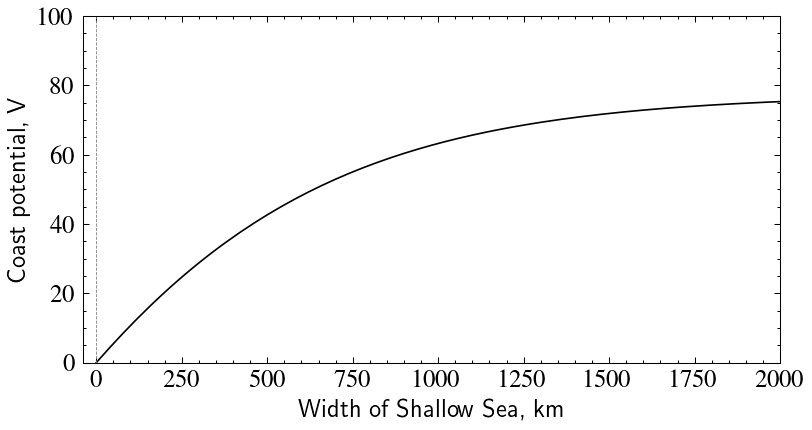

In [10]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, dpi=150, figsize=(6, 3), sharex="all", sharey="all"
)
ax.set_ylabel("Coast potential, V")
ax.set_xlabel("Width of Shallow Sea, km")
ax.plot(
    lengths[:],
    Uc[:],
    "k",
    ls="-",
    lw=0.8,
    label=r"$U_C$"
)
# ax.axhline(77.46, color="k", ls="--", lw=0.5)
# ax.axhline(69.38, color="r", ls="--", lw=0.5)
# ax.text(3500, 85, r"$U_C^{L_{CS}>>}$=77.46 V", ha="left", va="top", fontdict={"color": "k", "size":10})
# ax.text(3500, 65, r"$U_E^{L_{CS}>>}$=69.38 V", ha="left", va="top", fontdict={"color": "r", "size":10})
ax.set_xlim(-40, 2000)
ax.axvline(0, ls="--", lw=0.4, color="gray")
ax.set_ylim(0, 100)
# ax.legend(loc=1, prop={"size": 10})

In [11]:
# Check Calculations from SW paper
stns, coords = ["FRD", "STJ", "HAD"], ["XYZ", "XYZ", "HDZ"]
db="input/data/{year}/"
dates, frames = [dt.datetime(1989,3,12),dt.datetime(1989,3,13),dt.datetime(1989,3,14)], {}
for stn, coord in zip(stns, coords):
    o = pd.DataFrame()
    for d in dates:
        f = db.format(year=d.year) + "{stn}_{date}_{coord}.txt".format(stn=stn, 
                                                                       date=d.strftime("%Y%m%d"), 
                                                                       coord=coord)
        o = pd.concat([o, bezpy.mag.read_iaga(f)])
    frames[stn] = o
    
land50 = PROFILES.CS_E
land50.layers[0].thickness = 50
# Create cable by each cable sections
tlines = []
tlines.append(
    TransmissionLine(
        sec_id="CS-W",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=39.6, lon=-74.33), 
                final=dict(lat=38.79, lon=-72.62)
            )
        ),
        elec_params=dict(
            site=PROFILES.CS_W,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=PROFILES.LD,
        ),
    ).compile_oml([
        "input/data/1989/FRD_19890312_XYZ.txt",
        "input/data/1989/FRD_19890313_XYZ.txt",
        "input/data/1989/FRD_19890314_XYZ.txt",
    ]),
)
tlines.append(
    TransmissionLine(
        sec_id="DO-1",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=38.79, lon=-72.62), 
                final=dict(lat=37.11, lon=-68.94)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_1,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/FRD_19890312_XYZ.txt",
        "input/data/1989/FRD_19890313_XYZ.txt",
        "input/data/1989/FRD_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="DO-2",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=37.11, lon=-68.94), 
                final=dict(lat=39.80, lon=-48.20)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_2,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/STJ_19890312_XYZ.txt",
        "input/data/1989/STJ_19890313_XYZ.txt",
        "input/data/1989/STJ_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="DO-3",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=39.80, lon=-48.20), 
                final=dict(lat=40.81, lon=-45.19)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_3,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/STJ_19890312_XYZ.txt",
        "input/data/1989/STJ_19890313_XYZ.txt",
        "input/data/1989/STJ_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="DO-4",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=40.81, lon=-45.19), 
                final=dict(lat=43.15, lon=-39.16)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_4,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/STJ_19890312_XYZ.txt",
        "input/data/1989/STJ_19890313_XYZ.txt",
        "input/data/1989/STJ_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="DO-5",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=43.15, lon=-39.16), 
                final=dict(lat=44.83, lon=-34.48)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_5,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/STJ_19890312_XYZ.txt",
        "input/data/1989/STJ_19890313_XYZ.txt",
        "input/data/1989/STJ_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="MAR",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=44.83, lon=-34.48), 
                final=dict(lat=46.51, lon=-22.43)
            )
        ),
        elec_params=dict(
            site=PROFILES.MAR,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/STJ_19890312_XYZ.txt",
        "input/data/1989/STJ_19890313_XYZ.txt",
        "input/data/1989/STJ_19890314_XYZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="DO-6",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=46.51, lon=-22.43), 
                final=dict(lat=47.85, lon=-9.05)
            )
        ),
        elec_params=dict(
            site=PROFILES.DO_6,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=None,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/HAD_19890312_HDZ.txt",
        "input/data/1989/HAD_19890313_HDZ.txt",
        "input/data/1989/HAD_19890314_HDZ.txt",
    ])
)
tlines.append(
    TransmissionLine(
        sec_id="CS-E",
        directed_length=dict(
            edge_locations=dict(
                initial=dict(lat=47.85, lon=-9.05), 
                final=dict(lat=50.79, lon=-4.55)
            )
        ),
        elec_params=dict(
            site=PROFILES.CS_E,
            width=1.0,
            flim=[1e-6, 1e0],
        ),
        active_termination=dict(
            right=land50,
            left=None,
        ),
    ).compile_oml([
        "input/data/1989/HAD_19890312_HDZ.txt",
        "input/data/1989/HAD_19890313_HDZ.txt",
        "input/data/1989/HAD_19890314_HDZ.txt",
    ])
)

2023-10-25 16:48:34.460 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS-W: 1.0
2023-10-25 16:48:34.461 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Continental Shelf West E- and B-Fields
2023-10-25 16:48:34.535 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS-W: 1.0
2023-10-25 16:48:34.548 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO-1: 1.0
2023-10-25 16:48:34.548 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Deep Ocean E- and B-Fields
2023-10-25 16:48:34.633 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO-2: 1.0
2023-10-25 16:48:34.634 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Deep Ocean E- and B-Fields
2023-10-25 16:48:34.719 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO-3: 1.0
2023-10-25 16:48:34.719 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Dee

In [12]:
cable = Cable(tlines, tlines[0].components)
cable.tot_params.head()
cable.tot_params.to_csv("1989Storm.csv")

2023-10-25 16:48:35.305 | INFO     | scubas.cables:run_nodal_analysis:350 - Eq. nodal analysis.
2023-10-25 16:48:35.306 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:0
2023-10-25 16:48:35.306 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:35.307 | INFO     | scubas.cables:run_nodal_analysis:367 - Adding active termination: left
2023-10-25 16:48:35.308 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:1
2023-10-25 16:48:35.308 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:2
2023-10-25 16:48:35.309 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:3
2023-10-25 16:48:35.309 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:4
2023-10-25 16:48:35.310 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:5
2023-10-25 16:48:35.311 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:6
2023-10-25 16:48:35.311 | INFO     | scubas.cables:run_nodal_analysis:354 - Node:7
2023-10-25 16:48:35.312 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


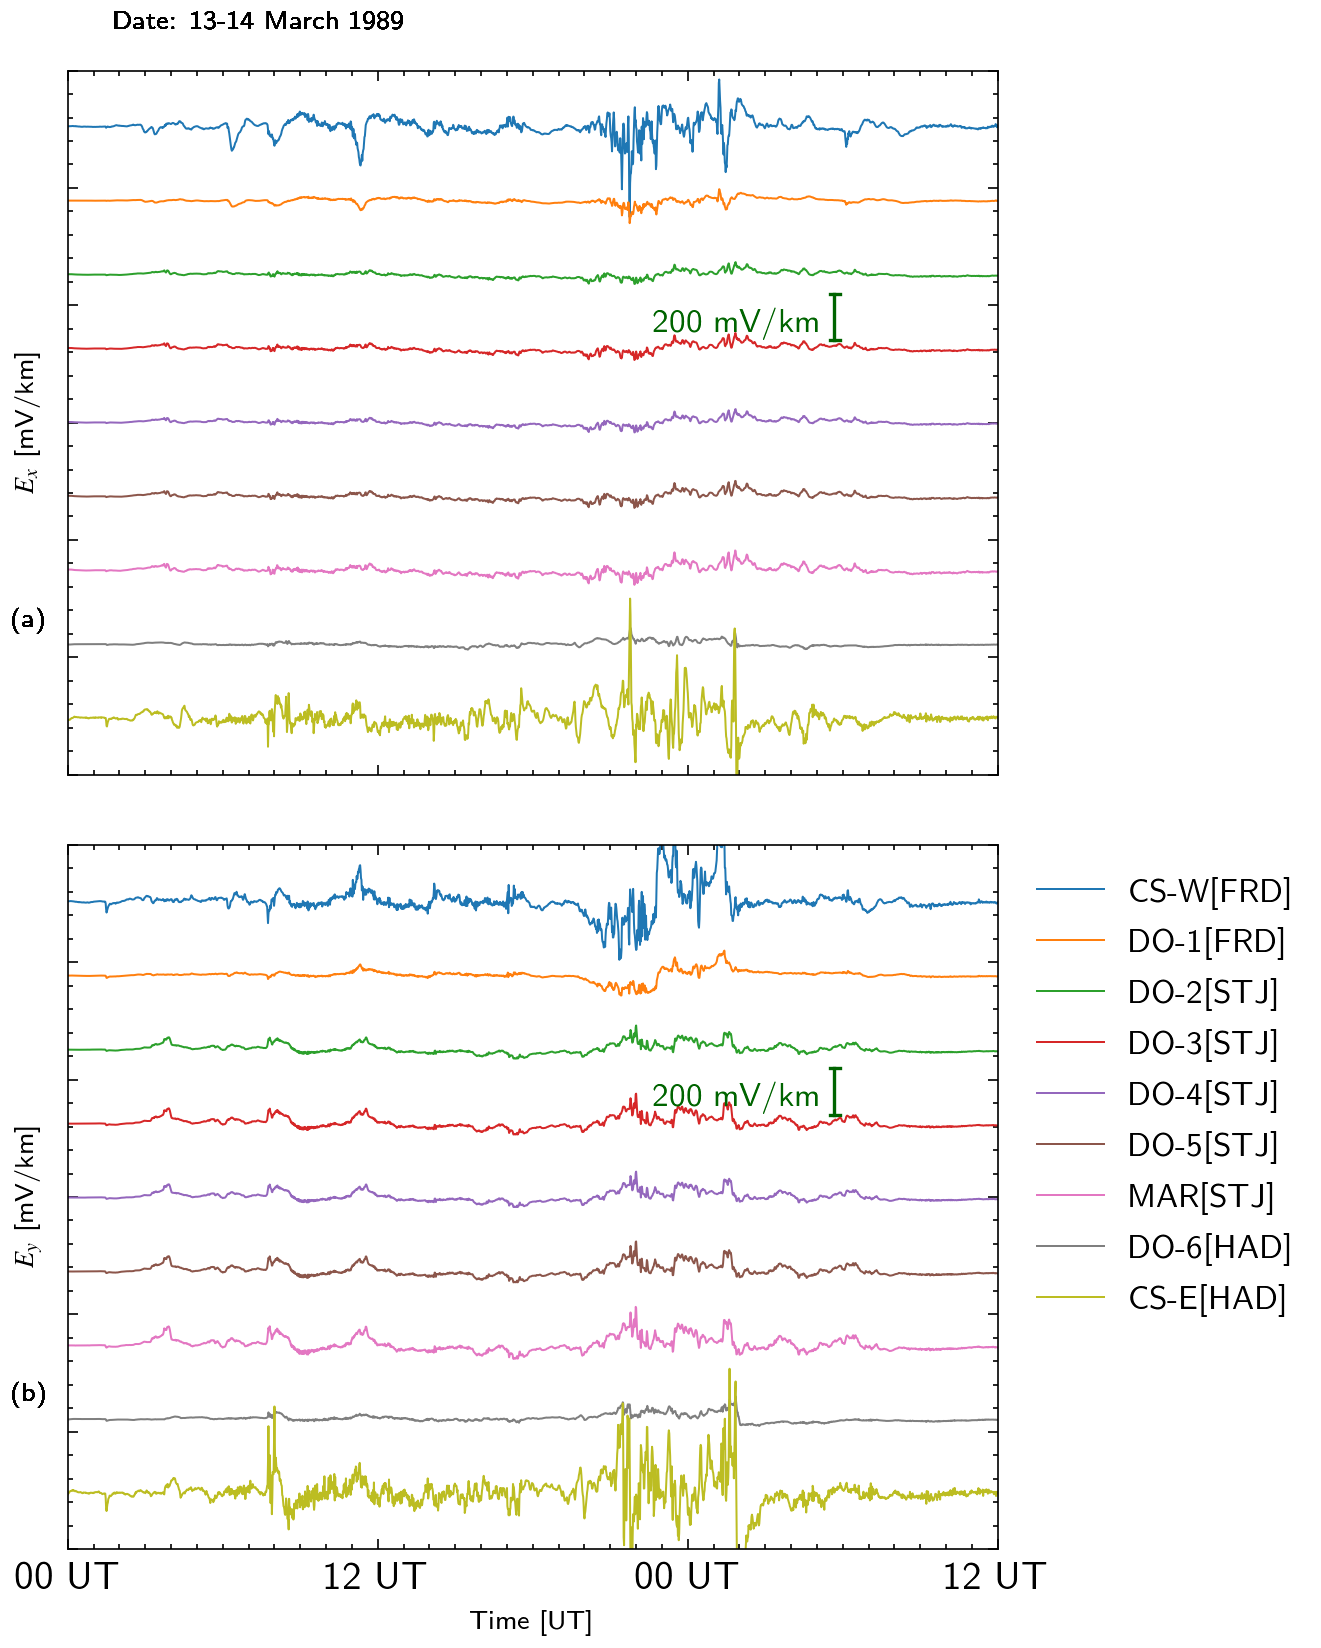

In [13]:
params = cable.tot_params
segment_name = ["CS-W", "DO-1", "DO-2", "DO-3", "DO-4", "DO-5", "MAR", "DO-6", "CS-E"]
stations = ["FRD", "FRD", "STJ", "STJ", "STJ", "STJ", "STJ", "HAD", "HAD"]

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=2, ncols=1, dpi=240, figsize=(5, 8), sharex=True)
multiplier, colors = np.array([4,3,2,1,0,-1,-2,-3,-4])*3.5, ["r", "k", "b"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
base=90
for i in range(9):
    ax = axes[0]
    ax.text(0.05, 1.05, "Date: 13-14 March 1989", ha="left", va="bottom", transform=ax.transAxes)
    ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
    ax.xaxis.set_major_formatter(DateFormatter(r"%H UT"))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    #ax.xaxis.set_minor_formatter(DateFormatter("%H UT"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    ax.plot(
        params.index, 
        (base*multiplier[i])+params["E.X.%02d"%(i)]-np.mean(params["E.X.%02d"%(i)]), 
        colors[i], 
        ls="-", 
        lw=0.6
    )
    ax.set_xticklabels([])
    ax.set_ylabel(r"$E_x$ [mV/km]", fontdict={"color": "k"})
    ax.set_ylim(-1500,1500)
    ax.text(-0.06,0.2,"(a)",ha="left",va="bottom",transform=ax.transAxes)
    if i==0:
        ax.axvline(params.index.tolist()[-1100], ymin=18.5/30, ymax=20.5/30, 
                   color = "darkgreen", drawstyle="steps-mid")
        ax.axhline(350, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.axhline(550, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.text(params.index.tolist()[2800], 425, "200 mV/km", ha="left", va="center", 
                fontdict={"color": "darkgreen", "size":10})
    ax.set_yticklabels([])
    ax.legend(loc=2)
    ax = axes[1]
    ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
    ax.xaxis.set_major_formatter(DateFormatter(r"%H UT"))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    #ax.xaxis.set_minor_formatter(DateFormatter("%H UT"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    txt = r"%s[%s]"%(segment_name[i], stations[i])
    ax.plot(
        params.index, 
        (base*multiplier[i])+params["E.Y.%02d"%(i)]-np.mean(params["E.Y.%02d"%(i)]), 
        colors[i], 
        ls="-", 
        lw=0.6, 
        label=txt
    )
    ax.set_ylabel(r"$E_y$ [mV/km]", fontdict={"color": "k"})
    if i==0:
        ax.axvline(params.index.tolist()[-1100], ymin=18.5/30, ymax=20.5/30, 
                   color = "darkgreen", drawstyle="steps-mid")
        ax.axhline(350, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.axhline(550, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.text(params.index.tolist()[2800], 425, "200 mV/km", ha="left", va="center", 
                fontdict={"color": "darkgreen", "size":10})
        #ax.axvline(frame.index.tolist()[2000], ymin=4/6, ymax=5/6, color = "darkgreen", drawstyle="steps-mid")
        #ax.axhline(2000, xmin=0.25, xmax=0.25+2e-2, color = "darkgreen")
        #ax.axhline(1000, xmin=0.25, xmax=0.25+2e-2, color = "darkgreen")
        #ax.text(frame.index.tolist()[1970], 1500, "1000 nT", ha="right", va="center", fontdict={"color": "darkgreen", "size":10})
    ax.set_ylim(-1500,1500)
    ax.set_yticklabels([])
    ax.text(-0.06,0.2,"(b)",ha="left",va="bottom",transform=ax.transAxes)
axes[1].set_xlabel("Time [UT]")
axes[1].legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=10)
fig.subplots_adjust(wspace=.1, hspace=.1)

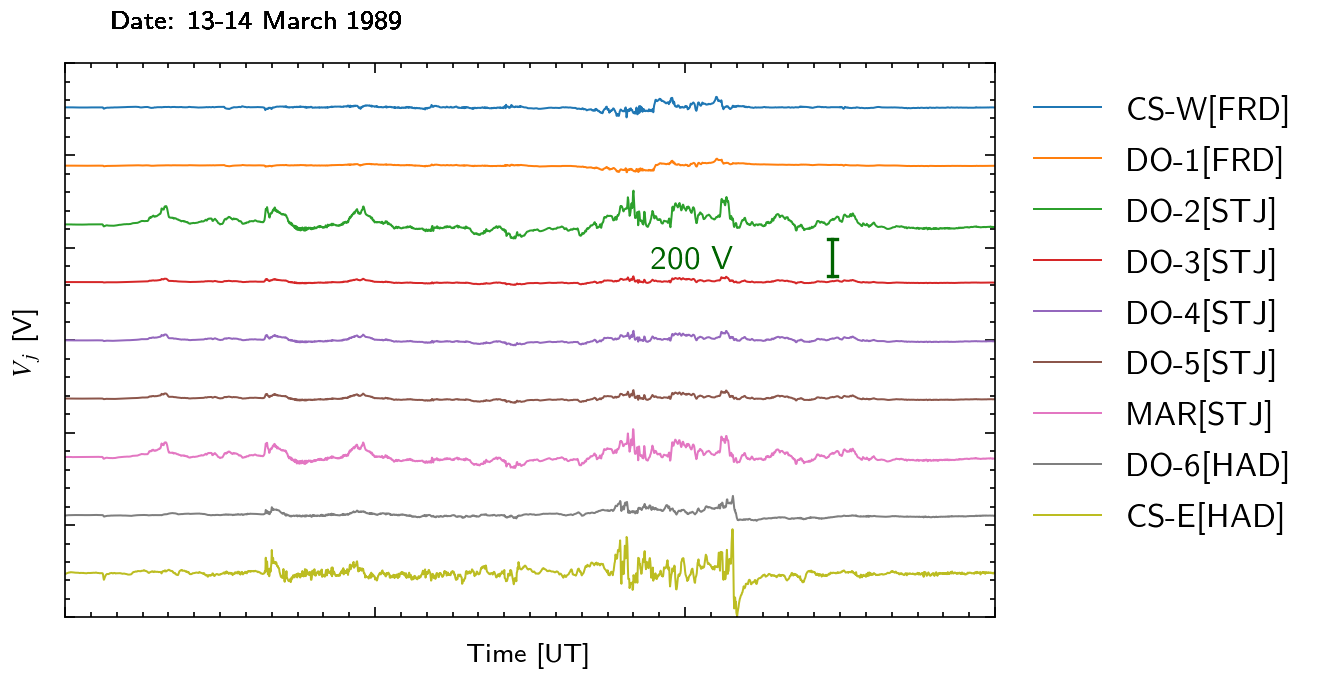

In [14]:
params = cable.tot_params
segment_name = ["CS-W", "DO-1", "DO-2", "DO-3", "DO-4", "DO-5", "MAR", "DO-6", "CS-E"]
stations = ["FRD", "FRD", "STJ", "STJ", "STJ", "STJ", "STJ", "HAD", "HAD"]

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=1, ncols=1, dpi=240, figsize=(5, 3))
multiplier, colors = np.array([4,3,2,1,0,-1,-2,-3,-4])*3.5, ["r", "k", "b"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
base=90
for i in range(9):
    txt = r"%s[%s]"%(segment_name[i], stations[i])
    ax = axes
    ax.text(0.05, 1.05, "Date: 13-14 March 1989", ha="left", va="bottom", transform=ax.transAxes)
    ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
    ax.xaxis.set_major_formatter(DateFormatter(r"%H UT"))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    #ax.xaxis.set_minor_formatter(DateFormatter("%H UT"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    ax.plot(
        params.index, 
        (base*multiplier[i])++params["V(v).%02d"%(i)]-np.mean(params["V(v).%02d"%(i)]), 
        #params["V(v).%02d"%(i)], 
        colors[i], 
        ls="-", 
        lw=0.6,
        label=txt
    )
    ax.set_xticklabels([])
    ax.set_ylabel(r"$V_j$ [V]", fontdict={"color": "k"})
    ax.set_ylim(-1500,1500)
#     #ax.text(-0.06,0.2,"(a)",ha="left",va="bottom",transform=ax.transAxes)
    if i==0:
        ax.axvline(params.index.tolist()[-1100], ymin=18.5/30, ymax=20.5/30, 
                   color = "darkgreen", drawstyle="steps-mid")
        ax.axhline(350, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.axhline(550, xmin=0.82, xmax=0.82+1e-2, color = "darkgreen")
        ax.text(params.index.tolist()[2800], 425, "200 V", ha="left", va="center", 
                fontdict={"color": "darkgreen", "size":10})
    ax.set_yticklabels([])
    ax.legend(loc=2)
    
axes.set_xlabel("Time [UT]")
axes.legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=10)
fig.subplots_adjust(wspace=.1, hspace=.1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


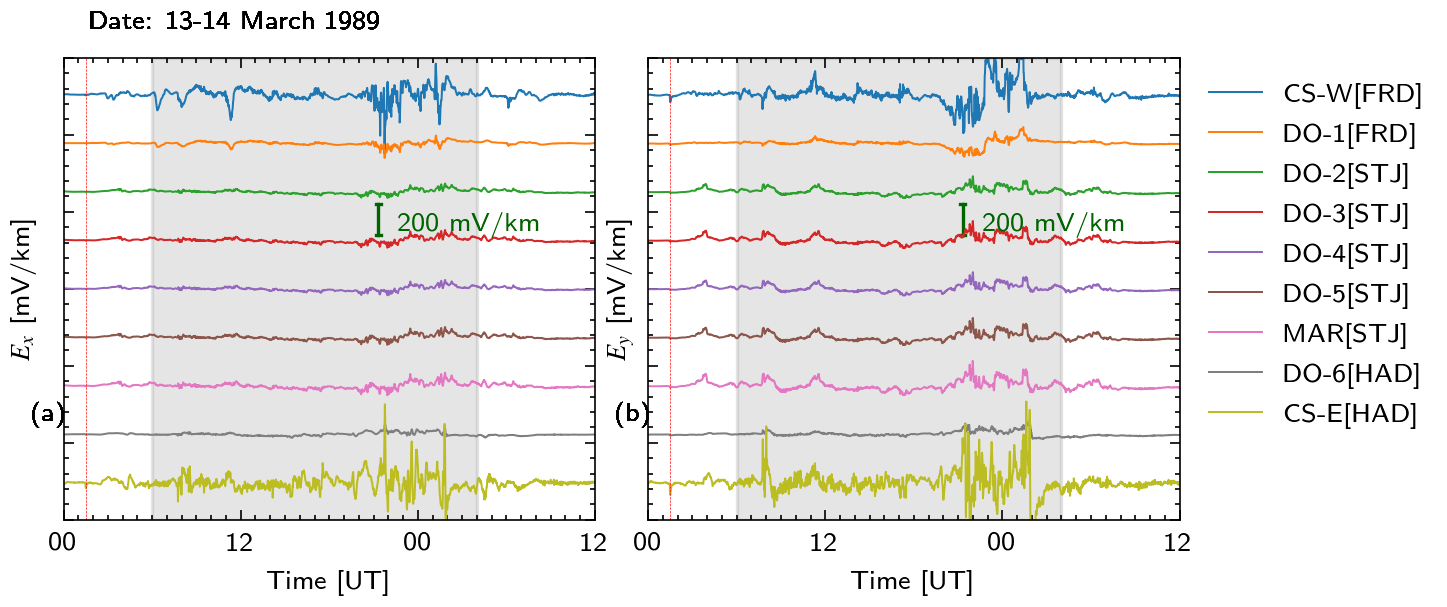

In [15]:
params = cable.tot_params
segment_name = ["CS-W", "DO-1", "DO-2", "DO-3", "DO-4", "DO-5", "MAR", "DO-6", "CS-E"]
stations = ["FRD", "FRD", "STJ", "STJ", "STJ", "STJ", "STJ", "HAD", "HAD"]

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=240, figsize=(6, 2.5), sharey=True)
multiplier, colors = np.array([4,3,2,1,0,-1,-2,-3,-4])*3.5, ["r", "k", "b"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
base=90
for i in range(9):
    ax = axes[0]
    ax.text(0.05, 1.05, "Date: 13-14 March 1989", ha="left", va="bottom", transform=ax.transAxes)
    ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
    ax.xaxis.set_major_formatter(DateFormatter(r"%H"))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    #ax.xaxis.set_minor_formatter(DateFormatter("%H UT"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    ax.plot(
        params.index, 
        (base*multiplier[i])+params["E.X.%02d"%(i)]-np.mean(params["E.X.%02d"%(i)]), 
        colors[i], 
        ls="-", 
        lw=0.6
    )
    #ax.set_xticklabels([])
    ax.tick_params(axis="both", labelsize=8)
    ax.set_ylabel(r"$E_x$ [mV/km]", fontdict={"color": "k"})
    ax.set_ylim(-1500,1500)
    ax.text(-0.06,0.2,"(a)",ha="left",va="bottom",transform=ax.transAxes)
    if i==0:
        ax.axvline(params.index.tolist()[-1600], ymin=18.5/30, ymax=20.5/30, 
                   color = "darkgreen", drawstyle="steps-mid")
        ax.axhline(350, xmin=0.587, xmax=0.587+1e-2, color = "darkgreen")
        ax.axhline(550, xmin=0.587, xmax=0.587+1e-2, color = "darkgreen")
        ax.text(params.index.tolist()[2800], 425, "200 mV/km", ha="left", va="center", 
                fontdict={"color": "darkgreen", "size":8})
    ax.set_yticklabels([])
    ax.legend(loc=2)
    ax = axes[1]
    ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
    ax.xaxis.set_major_formatter(DateFormatter(r"%H"))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
    #ax.xaxis.set_minor_formatter(DateFormatter("%H UT"))
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
    txt = r"%s[%s]"%(segment_name[i], stations[i])
    ax.plot(
        params.index, 
        (base*multiplier[i])+params["E.Y.%02d"%(i)]-np.mean(params["E.Y.%02d"%(i)]), 
        colors[i], 
        ls="-", 
        lw=0.6, 
        label=txt
    )
    ax.set_ylabel(r"$E_y$ [mV/km]", fontdict={"color": "k"})
    if i==0:
        ax.axvline(params.index.tolist()[-1600], ymin=18.5/30, ymax=20.5/30, 
                   color = "darkgreen", drawstyle="steps-mid")
        ax.axhline(350, xmin=0.587, xmax=0.587+1e-2, color = "darkgreen")
        ax.axhline(550, xmin=0.587, xmax=0.587+1e-2, color = "darkgreen")
        ax.text(params.index.tolist()[2800], 425, "200 mV/km", ha="left", va="center", 
                fontdict={"color": "darkgreen", "size":8})
        #ax.axvline(frame.index.tolist()[2000], ymin=4/6, ymax=5/6, color = "darkgreen", drawstyle="steps-mid")
        #ax.axhline(2000, xmin=0.25, xmax=0.25+2e-2, color = "darkgreen")
        #ax.axhline(1000, xmin=0.25, xmax=0.25+2e-2, color = "darkgreen")
        #ax.text(frame.index.tolist()[1970], 1500, "1000 nT", ha="right", va="center", fontdict={"color": "darkgreen", "size":10})
    ax.set_ylim(-1500,1500)
    ax.set_yticklabels([])
    ax.tick_params(axis="both", labelsize=8)
    ax.text(-0.06,0.2,"(b)",ha="left",va="bottom",transform=ax.transAxes)
axes[1].set_xlabel("Time [UT]")
axes[0].set_xlabel("Time [UT]")
axes[1].legend(bbox_to_anchor=(1.01, 1), loc="upper left", fontsize=8)
axes[0].axvline(dt.datetime(1989, 3, 13, 1, 30), color="r", ls="--", lw=0.2)
axes[0].axvspan(dt.datetime(1989, 3, 13, 6), dt.datetime(1989, 3, 14, 4), color="grey", alpha=0.2)

axes[1].axvline(dt.datetime(1989, 3, 13, 1, 30), color="r", ls="--", lw=0.2)
axes[1].axvspan(dt.datetime(1989, 3, 13, 6), dt.datetime(1989, 3, 14, 4), color="grey", alpha=0.2)

fig.subplots_adjust(wspace=.1, hspace=.1)

In [16]:
params["V(v)"].max(), params["V(v)"].min(), (params["V(v)"]+(-params["U0"]+params["U1"])).max(),(params["V(v)"]+(-params["U0"]+params["U1"])).min(),

(582.7636172957496, -293.63896944139947, 743.8427877324511, -345.2661301018801)

In [17]:
params.columns

Index(['V(v)', 'E.Y', 'E.Y.00', 'E.Y.01', 'E.Y.02', 'E.Y.03', 'E.Y.04',
       'E.Y.05', 'E.Y.06', 'E.Y.07', 'E.Y.08', 'E.X', 'E.X.00', 'E.X.01',
       'E.X.02', 'E.X.03', 'E.X.04', 'E.X.05', 'E.X.06', 'E.X.07', 'E.X.08',
       'V(v).00', 'V(v).01', 'V(v).02', 'V(v).03', 'V(v).04', 'V(v).05',
       'V(v).06', 'V(v).07', 'V(v).08', 'Vt(v)', 'U0', 'U1'],
      dtype='object')

In [27]:
o = params[(params.index>=dt.datetime(1989,3,14,1)) & (params.index<=dt.datetime(1989,3,14,2))]
((o["V(v)"] + (o["U0"]-o["U1"]))).max() -((o["V(v)"] + (o["U0"]-o["U1"]))).min()

763.71245705451

In [19]:
tlines[-1].active_termination.right.__dict__

{'layers': [<scubas.datasets.Layer at 0x7f7e6be868d0>,
 'desciption': 'Space Weather Paper: Cable (TAT-8) Section 1 / Used in SW 1989 Storm study',
 'name': 'Continental Shelf East',
 'Yn': 0.0025458752709160226,
 'Jn': {'Y': array([-0.02785813, -0.02728191, -0.03020704, ...,  0.00628796,
         -0.02620501, -0.03443134]),
  'X': array([0.00440116, 0.00575454, 0.00811039, ..., 0.0020464 , 0.00338327,
         0.00487007])},
 'Z0': 392.7922201939585,
 'R': 180000000.60000002,
 'C': 1166.666565,
 'Z': 0.0008571429318367412,
 'Y': 5.555555537037037e-09,
 'gma': 2.1821789938036174e-06}

Text(1989-03-13 15:50:00, 2300, '500 V')

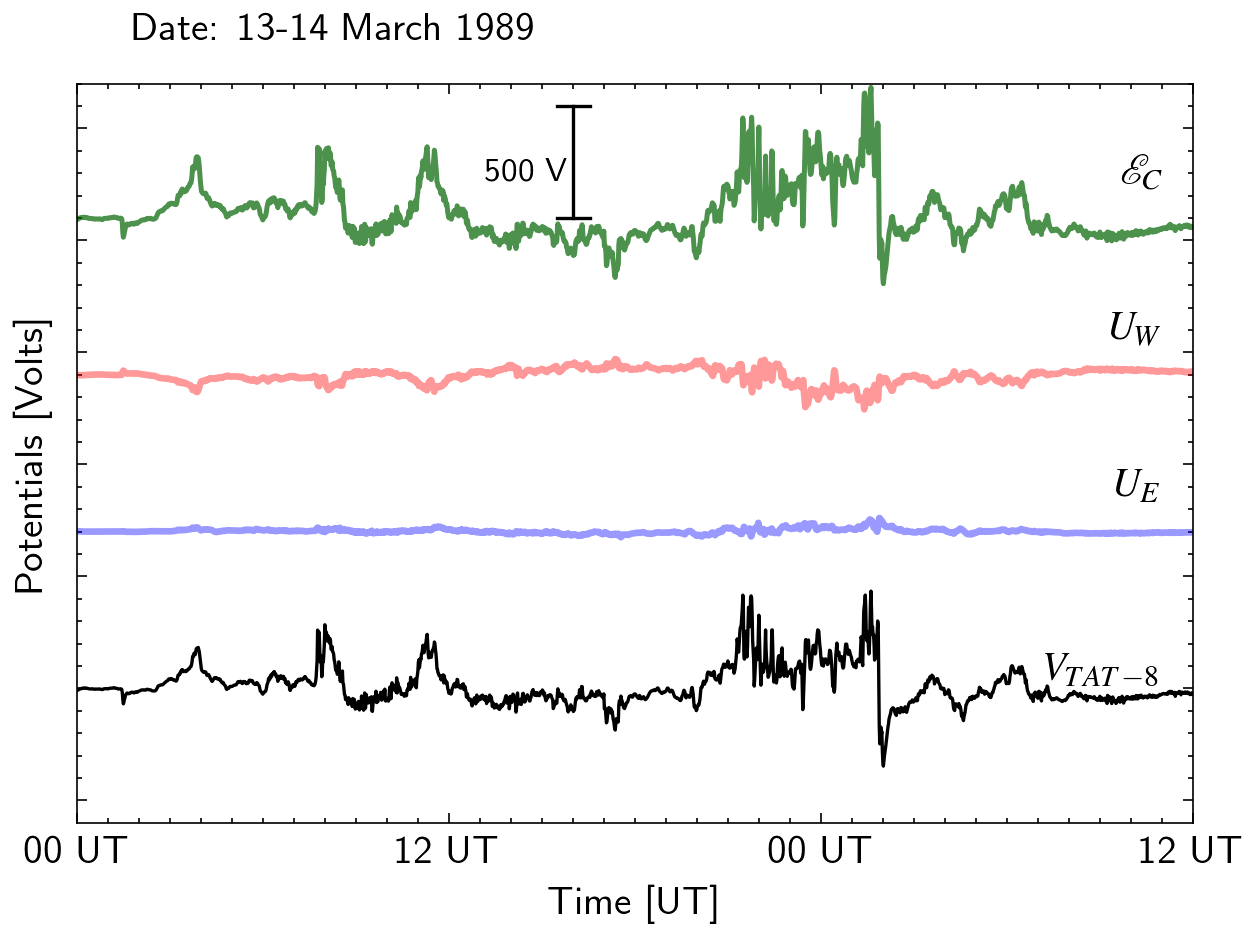

In [20]:
mpl.rcParams.update({"xtick.labelsize": 12, "ytick.labelsize":12, "font.size":12})
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=240, figsize=(6, 4), sharex=True)
ax.set_xlim(dt.datetime(1989,3,13), dt.datetime(1989,3,14,12))
ax.xaxis.set_major_formatter(DateFormatter(r"%H UT"))
ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 12)))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
ax.plot(params.index, params["V(v)"]+2100, "darkgreen", ls="-", lw=1.5, label=r"$\mathcal{E}_C$", alpha=0.7)
ax.plot(params.index, params["U0"]+1400, "r", ls="-", lw=2, alpha=0.4, label=r"$U_W$")
ax.plot(params.index, params["U1"]+700, "b", ls="-", lw=2, alpha=0.4, label=r"$U_E$")
ax.plot(params.index, params["V(v)"]+(params["U0"]-params["U1"]), "k", ls="-", lw=1., label=r"$V_{TAT-8}$")
ax.set_ylim(-600, 2700)
ax.set_xlabel("Time [UT]")
ax.set_ylabel("Potentials [Volts]")
ax.text(0.05, 1.05, "Date: 13-14 March 1989", ha="left", va="bottom", transform=ax.transAxes)
#ax.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
ax.set_yticklabels([])
ax.text(dt.datetime(1989,3,14,11), params["U0"].iloc[-1]+1500, r"$U_W$", ha="right", va="bottom")
ax.text(dt.datetime(1989,3,14,11), params["U1"].iloc[-1]+800, r"$U_E$", ha="right", va="bottom")
ax.text(dt.datetime(1989,3,14,11), params["V(v)"].iloc[-1]+2200, r"$\mathcal{E}_C$", ha="right", va="bottom")
ax.text(dt.datetime(1989,3,14,11), (params["V(v)"]+(params["U0"]-params["U1"])).iloc[-1], r"$V_{TAT-8}$", 
        ha="right", va="bottom")
ax.axvline(dt.datetime(1989,3,13,16), ymin=2700/3300, ymax=3200/3300, color = "k", drawstyle="steps-mid")
ax.axhline(2700-600, xmin=0.43, xmax=0.43+3e-2, color = "k")
ax.axhline(3200-600, xmin=0.43, xmax=0.43+3e-2, color = "k")
ax.text(dt.datetime(1989,3,13,15,50), 2300, "500 V", ha="right", va="center", fontdict={"color": "k", "size":10})

In [21]:
# Plot transfer function (amplitude and phase)
# segment_name = ["CS-W", "DO-1", "DO-2", "DO-3", "DO-4", "DO-5", "MAR", "DO-6", "CS-E"]
# labs = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)"]
# fig = plt.figure(dpi=240, figsize=(8,8))
# for i in range(9):
#     tf = tlines[i].model.get_TFs()
#     ax = fig.add_subplot(331+i)
#     ax.loglog(tf.freq, np.abs(tf.E2B), "r", lw=1.0, ls="-")
#     if i in [6,7,8]: ax.set_xlabel(r"Frequency [Hz]")
#     else: ax.set_xticks([])
#     if i in [0,3,6]: ax.set_ylabel(r"Amplitude [mV/km/nT]", color="r")
#     else: ax.set_yticks([])
#     ax.set_xlim(1e-6,1e-2)
#     ax.set_ylim(1e-3,1e0)
#     ax.text(0.9, 0.1, segment_name[i], ha="right", va="center", transform=ax.transAxes)
#     ax = ax.twinx()
#     ax.semilogx(tf.freq, np.angle(tf.E2B, deg=True), "b", lw=1., ls="-")
#     ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
#     if i in [2,5,8]: ax.set_ylabel(r"Phase $[^\circ]$", color="b")
#     else: ax.set_yticks([])
#     if i not in [6,7,8]: ax.set_xticks([])
#     ax.set_ylim(-90, 90)
#     _ = ax.set_xlim(1e-6,1e-2)
#     ax.text(0.05,0.1,labs[i],ha="left",va="center",transform=ax.transAxes)
# fig.subplots_adjust(wspace=0.2,hspace=0.2)

2023-10-25 16:48:38.239 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.239 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.240 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.240 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.241 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
/home/shibaji/CodeBase/SCUBAS/scubas/cables.py:250: RuntimeWarning: divide by zero encountered in double_scalars
  self.Ye[a] = 1.0 / (self.Z0 * np.sinh(self.gma * L))
/home/shibaji/CodeBase/SCUBAS/scubas/cables.py:251: RuntimeWarning: invalid value encountered in double_scalars
  self.Yp2[a] = (np.cosh(self.gma * L) - 1) * self.Ye[a]
2023-10-25 16:48:38.245 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 

2023-10-25 16:48:38.323 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.324 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.324 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.325 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.327 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.329 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.330 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.330 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.331 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.33

2023-10-25 16:48:38.415 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.418 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.418 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.419 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.419 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.419 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.423 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.425 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.426 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.42

2023-10-25 16:48:38.511 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.511 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.514 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.517 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.517 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.518 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.518 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.519 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.522 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:3

2023-10-25 16:48:38.608 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.609 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.609 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.610 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.613 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.615 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.616 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.616 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.617 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.61

2023-10-25 16:48:38.703 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.706 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.707 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.707 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.708 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.708 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.711 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.714 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.714 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.71

2023-10-25 16:48:38.798 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.799 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.802 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.804 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.805 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.805 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.806 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.806 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.809 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:3

2023-10-25 16:48:38.895 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.896 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.896 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.897 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.900 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.903 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.903 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.903 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.904 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.90

2023-10-25 16:48:38.991 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.993 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.994 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.994 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:38.995 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:38.995 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:38.998 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.001 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.001 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.00

2023-10-25 16:48:39.086 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.086 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.089 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.092 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.092 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.093 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.093 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.094 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.097 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:3

2023-10-25 16:48:39.183 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.183 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.184 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.184 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.187 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.190 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.190 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.191 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.191 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.19

2023-10-25 16:48:39.278 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.281 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.281 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.282 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.282 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.283 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.286 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.288 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.289 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.28

2023-10-25 16:48:39.373 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.374 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.377 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.380 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.380 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.381 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.381 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.382 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.384 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:3

2023-10-25 16:48:39.471 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.471 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.472 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.472 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.475 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.478 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.478 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.479 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.479 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.48

2023-10-25 16:48:39.566 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.569 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.569 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.570 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.570 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.571 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.574 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.576 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.577 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.57

2023-10-25 16:48:39.661 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.661 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.664 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.667 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.667 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.668 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-10-25 16:48:39.668 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:39.669 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width DO: 1.0
2023-10-25 16:48:39.672 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width CS: 1.0
2023-10-25 16:48:3

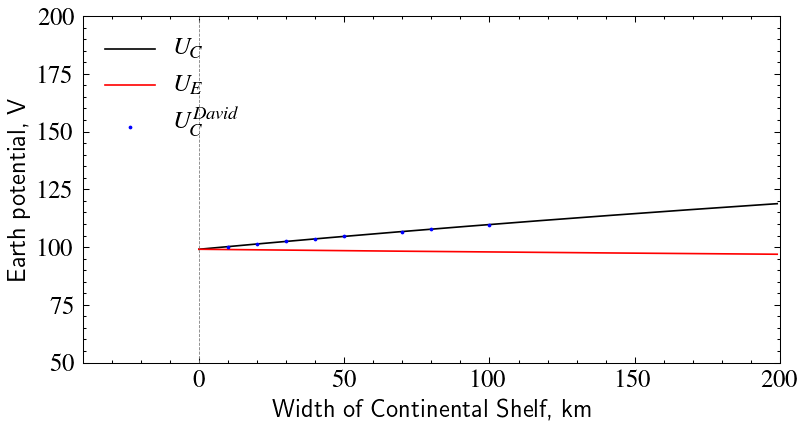

In [22]:
# Analytical Solution for simple boundaries
Vc = [100.217, 101.351, 102.466, 103.562, 104.639, 106.741, 107.766, 109.767]
L = [10, 20, 30, 40, 50, 70, 80, 100]

lengths = np.arange(0, 200, 1)
Uc, Ue = [], []
cable_lists = []
for i, l in enumerate(lengths):
    tlines = []
    tlines.append(
        TransmissionLine(
            sec_id="DO",
            directed_length=dict(
                length_north=10000,
            ),
            elec_params=dict(
                site=PROFILES.DO,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=None,
                left=PROFILES.LD,
            ),
        )
    )
    tlines.append(
        TransmissionLine(
            sec_id="CS",
            directed_length=dict(
                length_north=l,
            ),
            elec_params=dict(
                site=PROFILES.CS,
                width=1.0,
                flim=[1e-6, 1e0],
            ),
            active_termination=dict(
                right=PROFILES.LD,
                left=None,
            ),
        )
    )
    tlines[0].compute_eqv_pi_circuit(e_DO, ["X"])
    tlines[1].compute_eqv_pi_circuit(e_CS, ["X"])
    
    E1, E2 = (
        e_DO.X.tolist()[0]*1e-3,
        e_CS.X.tolist()[0]*1e-3
    )
    Z01, Z02 = (
        tlines[0].Z0,
        tlines[1].active_termination.right.Z0
    )
    gm1, gm2 = (
        tlines[0].gma*1e3,
        tlines[1].active_termination.right.gma*1e3
    )
    El = l*e_CS.X.tolist()[0]*1e-3
    Zl = tlines[1].Z*1e3*l
    I = ( (E1/gm1) + (El) + (E2/gm2) ) / (Z01 + (Zl) + Z02)
    uc = I*Z02 - (E2/gm2)
    ue = (E1/gm1) - I*Z01
    #print(E1, E2, Z01, Z02, E1/gm1, E2/gm2, I)
#     print(
#         tlines[1].active_termination.right.Z0, 
#         tlines[1].active_termination.right.Z,
#         tlines[1].active_termination.right.Y,
#         tlines[1].active_termination.right.gma
#     )
    Uc.append(uc)
    Ue.append(ue)
    #break

fig, ax = plt.subplots(
    nrows=1, ncols=1, dpi=150, figsize=(6, 3), sharex="all", sharey="all"
)
ax.set_ylabel("Earth potential, V")
ax.set_xlabel("Width of Continental Shelf, km")
ax.plot(
    lengths[:],
    Uc[:],
    "k",
    ls="-",
    lw=0.8,
    label=r"$U_C$"
)
ax.plot(
    lengths[:],
    Ue[:],
    "r",
    ls="-",
    lw=0.8,
    label=r"$U_E$"
)
ax.plot(
    L,
    Vc,
    "bo",
    ls="None",
    ms=0.8,
    label=r"$U_C^{David}$"
)
ax.set_xlim(-40, 200)
ax.axvline(0, ls="--", lw=0.4, color="gray")
ax.set_ylim(50, 200)
ax.legend(loc=2, prop={"size": 12})

In [23]:
print(
    tlines[1].active_termination.right.C,
    tlines[1].active_termination.right.R,
    tlines[1].active_termination.right.Z0, 
    tlines[1].active_termination.right.Z*1e3,
    tlines[1].active_termination.right.Y*1e3,
    tlines[1].active_termination.right.gma*1e3
)

333.3333 200000000.60000002 774.5967091332149 3.00000030000003 4.999999985e-06 0.0038729835340471238
